In [1]:
# Installing necessary packages
# !pip install yfinance

# Importing Required Packages

In [2]:
# Importing required libraries

# Financia library
import yfinance as yf

# Data manipulation labraries
import numpy as np
import pandas as pd

# Visualization libraries
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler 
import pickle 
from tqdm.notebook import tnrange

# Deep learning library
import tensorflow as tf

# Restricting the float value of a dataframe to 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Removing the limit for the number of displayed columns in a dataframe
pd.set_option("display.max_columns", None)
# Setting the theme and fontsize of figures
sns.set_theme(style = 'darkgrid', font_scale = 1.2)

## Loading and Viewing the Dataset 

In [3]:
# Downloading google's stock data
data = yf.download('GOOGL', start = '2018-01-01', end = '2022-12-31', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
# Checking the shape of data set
print('The stock data has {} features and {} observations.'.format(
                                                              data.shape[1], data.shape[0]))
# Visiting the top 5 rows
print('\nFirst five rows:')
display(data.head())

# Visiting the bottom 5 rows
print('\nLast five rows:')
display(data.tail())

The stock data has 6 features and 1259 observations.

First five rows:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.651,53.799,52.651,53.660,53.660,31766000
2018-01-03,53.696,54.805,53.672,54.576,54.576,31318000
2018-01-04,54.854,55.204,54.713,54.788,54.788,26052000
2018-01-05,55.173,55.679,55.090,55.514,55.514,30250000
2018-01-08,55.550,55.958,55.500,55.710,55.710,24644000



Last five rows:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,87.110,89.550,87.070,89.230,89.230,23003000
2022-12-27,88.800,88.940,87.010,87.390,87.390,20097300
2022-12-28,86.980,88.040,85.940,86.020,86.020,19523200
2022-12-29,86.620,88.850,86.610,88.450,88.450,23333500
2022-12-30,86.980,88.300,86.570,88.230,88.230,23964900


## Understanding the Trends of the Data




In [5]:
# Sorting the data points based on indexes just for confirmation 
data.sort_index(inplace = True)

In [6]:
# Removing any duplicate index 
data = data.loc[~data.index.duplicated(keep = 'first')]

In [7]:
# Checking for missing values 
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1259.000,85.700,30.779,49.216,58.783,73.775,112.595,151.250
High,1259.000,86.652,31.073,50.606,59.270,74.426,114.007,151.546
Low,1259.000,84.740,30.419,48.883,58.183,73.005,111.425,148.899
Close,1259.000,85.711,30.738,49.234,58.739,73.955,112.674,149.839
Adj Close,1259.000,85.711,30.738,49.234,58.739,73.955,112.674,149.839
Volume,1259.000,35282554.964,16033693.183,9312000.000,25062150.000,31436000.000,40255000.000,133178000.000


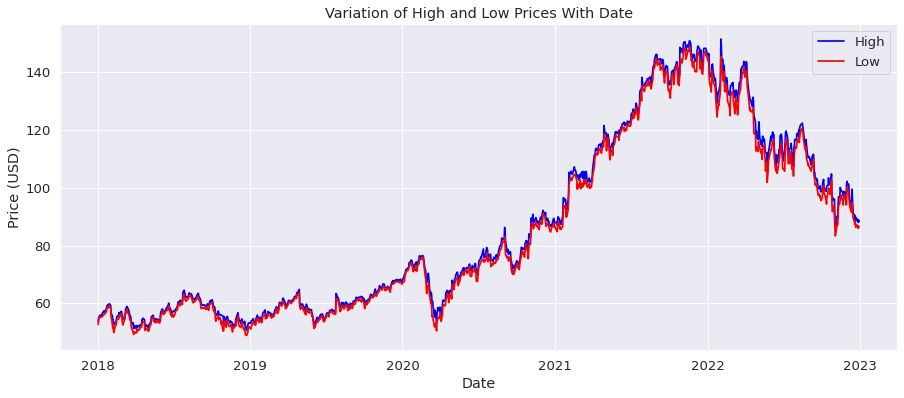

In [9]:
# Checking the trends in high and low prices of a day in the same plot 
plt.figure(figsize = (15, 6));
plt.plot(data.index, data.High, color = 'blue', linewidth = 1.7);
plt.plot(data.index, data.Low, color = 'red', linewidth = 1.7);
plt.title('Variation of High and Low Prices With Date');
plt.legend(['High', 'Low']);
plt.xlabel('Date');
plt.ylabel('Price (USD)');

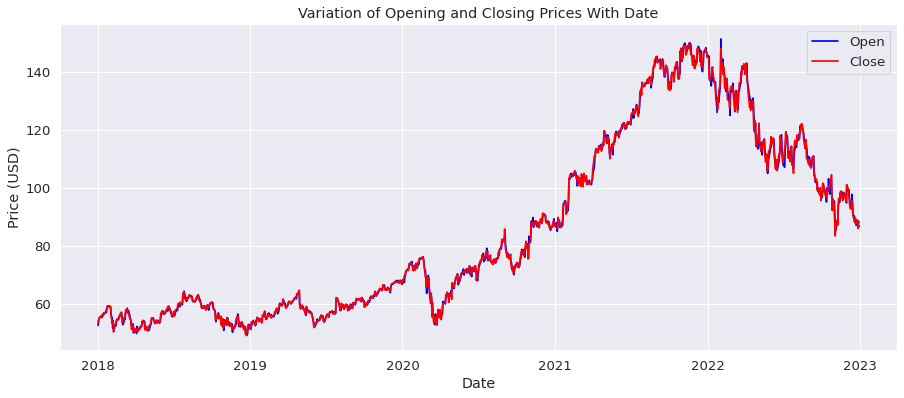

In [10]:
# Checking the trend in opening and closing values 
plt.figure(figsize = (15, 6));
plt.plot(data.index, data.Open, color = 'blue', linewidth = 1.7);
plt.plot(data.index, data.Close, color = 'red', linewidth = 1.7);
plt.title('Variation of Opening and Closing Prices With Date');
plt.legend(['Open', 'Close']);
plt.xlabel('Date');
plt.ylabel('Price (USD)');

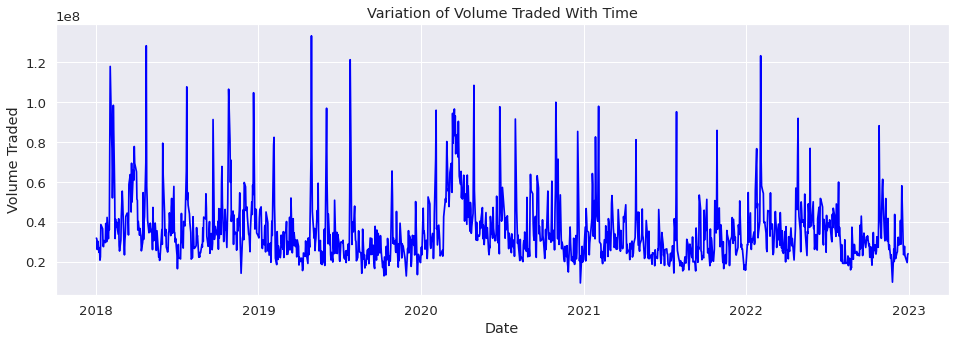

In [11]:
# Checking the trend in volume traded
plt.figure(figsize = (16, 5));
plt.plot(data.index, data.Volume, color = 'blue', linewidth = 1.7);
plt.xlabel('Date');
plt.ylabel('Volume Traded');
plt.title('Variation of Volume Traded With Time');

## Data Preparation for Modeling

In [12]:
# Filtering the required columns 
data = data[['Close' , 'Volume']]
data.head()

,Close,Volume
Date,,
2018-01-02,53.660,31766000
2018-01-03,54.576,31318000
2018-01-04,54.788,26052000
2018-01-05,55.514,30250000
2018-01-08,55.710,24644000


In [13]:
# Confirming the length of the testing set 
test_length = data[(data.index >= '2022-06-01')].shape[0]
print('Size of test set to the that of the full data:', round(test_length/data.shape[0], 3))

Size of test set to the that of the full data: 0.118


In [14]:
# Dividing data into batches with the length  = feature_length including predictors/target,
# as we want to use only the past feature_length data points to predict the next one 
def CreateFeatures_and_Targets(data, feature_length):
    X = []
    Y = []

    for i in tnrange(len(data) - feature_length): 
        X.append(data.iloc[i:i + feature_length, :].values)
        Y.append(data["Close"].values[i+feature_length])

    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [15]:
# Separating predictors from the target
X, Y = CreateFeatures_and_Targets(data, 32)

  0%|          | 0/1227 [00:00<?, ?it/s]

In [16]:
# The shape of predictors
print('Predictors\' shape:', X.shape) 
# The shape of target variables
print('Target\'s shape:', Y.shape)

Predictors' shape: (1227, 32, 2)
Target's shape: (1227,)


In [17]:
# Splitting the dataset between training and test sets
Xtrain, Xtest, Ytrain, Ytest = X[:-test_length], X[-test_length:], Y[:-test_length], Y[-test_length:]

In [18]:
# Checking the shape the training set 
print('The shape of predictors in the training set:', Xtrain.shape) 
print('The shape of target in the training set:', Ytrain.shape) 

The shape of predictors in the training set: (1079, 32, 2)
The shape of target in the training set: (1079,)


In [19]:
# Checking the shape the test set 
print('The shape of predictors in the test set:', Xtest.shape) 
print('The shape of target in the test set:', Ytest.shape) 

The shape of predictors in the test set: (148, 32, 2)
The shape of target in the test set: (148,)


In [20]:
# Creating a scaler for multi-dimensional vectors 
class MultiDimensionScaler():
    def __init__(self):
        self.scalers = []

    def fit_transform(self, X):
        total_dims = X.shape[2]
        for i in range(total_dims):
            Scaler = MinMaxScaler()
            X[:, :, i] = Scaler.fit_transform(X[:,:,i])
            self.scalers.append(Scaler)
        return X

    def transform(self, X):
        for i in range(X.shape[2]):
            X[:, :, i] = self.scalers[i].transform(X[:,:,i])
        return X 

In [21]:
# Scaling the predictors in the training and test sets
Feature_Scaler = MultiDimensionScaler()
Xtrain = Feature_Scaler.fit_transform(Xtrain)
Xtest = Feature_Scaler.transform(Xtest)

In [22]:
# Scaling the target in the training and test sets
Target_Scaler = MinMaxScaler()
Ytrain = Target_Scaler.fit_transform(Ytrain.reshape(-1, 1))
Ytest = Target_Scaler.transform(Ytest.reshape(-1, 1))

In [23]:
def save_object(obj , name : str):
    pickle_out = open(f"{name}.pck", "wb")
    pickle.dump(obj, pickle_out)
    pickle_out.close()

def load_object(name : str):
    pickle_in = open(f"{name}.pck", "rb")
    data = pickle.load(pickle_in)
    return data

In [24]:
# Saving your objects (scalers) for future purposes 
save_object(Feature_Scaler, "Feature_Scaler")
save_object(Target_Scaler, "Target_Scaler")

## Model Building

In [25]:
# Defining the callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

save_best = ModelCheckpoint("best_weights.tf", monitor = 'val_loss', verbose = 1, 
                            save_best_only = True, save_weights_only = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.25, patience = 2, min_lr = 0.0001, verbose = 1)

In [26]:
# Building the RNN-based DL model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(256, return_sequences = True, recurrent_dropout = 0.1, 
                             input_shape = (X.shape[1], X.shape[2]))))
model.add(LSTM(128, recurrent_dropout = 0.1))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'elu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'elu'))
model.add(Dense(1, activation = 'linear'))

In [27]:
# Setting the optimizer and metric for loss function 
#optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002)
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer = optimizer)

# In TS forecasting, we typically use very small numbers for batch size, as the problem statement is
# very complex, and the weights should be updated quite frequently, and SGD is a better optimizer
# when batch size is low (1 or 2). 

In [28]:
# Fitting the model
history = model.fit(Xtrain, Ytrain,
                    epochs = 10,
                    batch_size = 1,
                    verbose = 1,
                    shuffle = False ,
                    validation_data = (Xtest, Ytest),
                    callbacks = [reduce_lr, save_best])

Epoch 1/10
1079/1079 [==============================] - ETA: 0s - loss: 0.0026
Epoch 1: val_loss improved from inf to 0.01428, saving model to best_weights.tf
1079/1079 [==============================] - 394s 357ms/step - loss: 0.0026 - val_loss: 0.0143 - lr: 0.0100
Epoch 2/10
1079/1079 [==============================] - ETA: 0s - loss: 0.0031
Epoch 2: val_loss did not improve from 0.01428
1079/1079 [==============================] - 374s 347ms/step - loss: 0.0031 - val_loss: 0.0162 - lr: 0.0100
Epoch 3/10
1079/1079 [==============================] - ETA: 0s - loss: 0.0031
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 3: val_loss did not improve from 0.01428
1079/1079 [==============================] - 373s 346ms/step - loss: 0.0031 - val_loss: 0.0155 - lr: 0.0100
Epoch 4/10
1079/1079 [==============================] - ETA: 0s - loss: 0.0065
Epoch 4: val_loss did not improve from 0.01428
1079/1079 [==============================] - 373s 346ms/step -

In [29]:
# Checking the model's structure 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (1, 32, 512)             530432    
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (1, 128)                  328192    
                                                                 
 dropout (Dropout)           (1, 128)                  0         
                                                                 
 dense (Dense)               (1, 64)                   8256      
                                                                 
 dropout_1 (Dropout)         (1, 64)                   0         
                                                                 
 dense_1 (Dense)             (1, 32)                   2080      
                                                        

In [30]:
# Loading the best weights into the model
model.load_weights("best_weights.tf")

## Visualization of Predictions on the Test Set

In [31]:
# Making predictions on the test set
Predictions = model.predict(Xtest)

# Transforming the predictions and actual data to their original form
Predictions = Target_Scaler.inverse_transform(Predictions)
Actual = Target_Scaler.inverse_transform(Ytest)
Predictions = np.squeeze(Predictions , axis = 1)
Actual = np.squeeze(Actual, axis = 1)

5/5 [==============================] - 2s 101ms/step


In [32]:
# Creating a dataframe of actual data points and their RNN predictions
test_dataframe_dict = {'Actual': list(Actual), 'Predicted': list(Predictions)}
test_df = pd.DataFrame.from_dict(test_dataframe_dict)

test_df.index = data.index[-test_length:]
test_df.head()

,Actual,Predicted
Date,,
2022-06-01,113.892,111.748
2022-06-02,117.622,111.780
2022-06-03,114.541,112.049
2022-06-06,116.821,112.428
2022-06-07,117.149,112.873


In [33]:
# Calculating prediction errors

# Importing relevant error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Defining a function to calculate MAPE score
def mape_score(y_true, y_pred):
    score = 0
    for i in range(y_true.shape[0]):
        score += (np.abs(y_true[i] - y_pred[i])/np.abs(y_true[i])*100)/y_true.shape[0]
    return score

In [34]:
# Reporting error metrics of the model
y_true = np.array(test_dataframe_dict['Actual'])
y_pred = np.array(test_dataframe_dict['Predicted'])
print('RMSE on the test data:', round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
print('MAE on the test data:', round(mean_absolute_error(y_true, y_pred), 2))
print('MAPE score on the test data (%):', round(mape_score(y_true, y_pred), 2))

RMSE on the test data: 8.28
MAE on the test data: 6.96
MAPE score on the test data (%): 7.03


## Visualization of Predictions on the Whole Data

In [35]:
# Concatenating training and test sets
Total_features = np.concatenate((Xtrain, Xtest), axis = 0)
Total_Targets = np.concatenate((Ytrain, Ytest), axis = 0)

In [36]:
# Making predictions on the whole data, i.e., reconstructing the 
# training set and forecasting the test set
Predictions = model.predict(Total_features)

# Transforming the predictions and actual data to their original form
Predictions = Target_Scaler.inverse_transform(Predictions)
Actual = Target_Scaler.inverse_transform(Total_Targets)
Predictions = np.squeeze(Predictions, axis = 1)
Actual = np.squeeze(Actual, axis = 1)

39/39 [==============================] - 4s 105ms/step


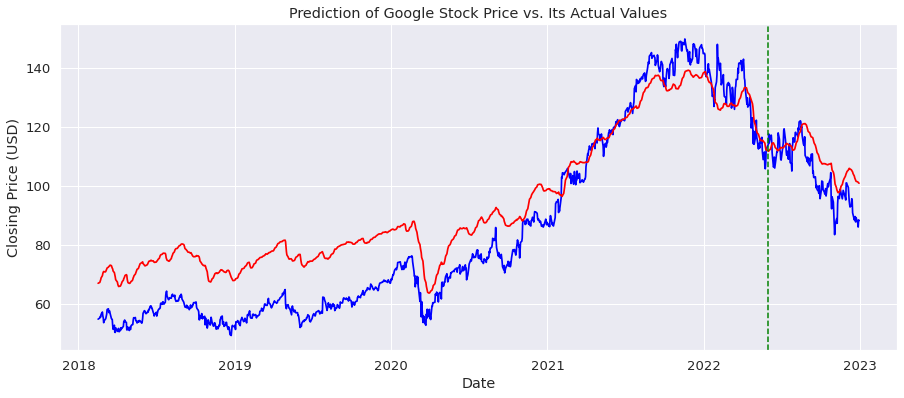

In [44]:
# Comparing ground truth to predictions
plt.figure(figsize = (15, 6));
plt.plot(data.index[32:], Actual, color = 'blue', linewidth = 1.7);
plt.plot(data.index[32:], Predictions, color = 'red', linewidth = 1.7);
plt.title('Prediction of Google Stock Price vs. Its Actual Values');
plt.xlabel('Date');
plt.ylabel('Closing Price (USD)');
plt.axvline(data.index[-test_length], color = 'green', linewidth = 1.5, linestyle = 'dashed');


#### Notes:

Values to the left of the vertical green line are reconstruction of the training set, while those to the right of this line are forecasts of the test set.